<a href="https://colab.research.google.com/github/Tejeswini-98/Forcasting-Time-series/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Necessary libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [ ]:
daily_temp = pd.read_csv('daily-minimum-temperatures.csv',)
daily_temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


## 3. Data Understanding

### 3.1 Initial Analysis

In [ ]:
daily_temp.shape

(3650, 2)

In [ ]:
daily_temp.isna().sum()

Date    0
Temp    0
dtype: int64

In [ ]:
daily_temp.dtypes

Date     object
Temp    float64
dtype: object

### 3.2 EDA

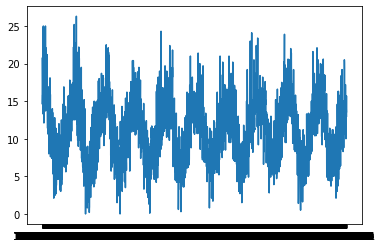

In [ ]:
plt.plot(daily_temp['Date'],daily_temp['Temp'])
plt.show()

### To display this chart in a better war so that we can get the Dates in X-axis, do the following.

In [ ]:
temp_data = pd.read_csv('daily-minimum-temperatures.csv',index_col=0,parse_dates=True)
temp_data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


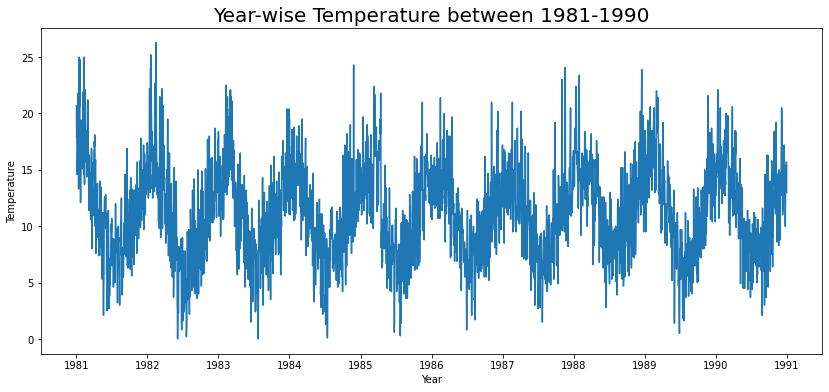

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(temp_data['Temp'])
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Year-wise Temperature between 1981-1990',size = 20)
plt.show()

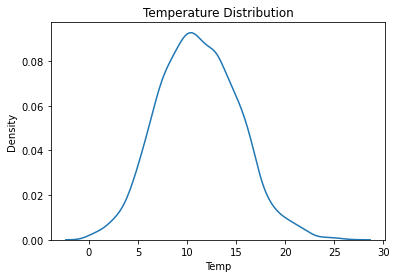

In [ ]:
sns.distplot(a = temp_data['Temp'],hist=False)
plt.title('Temperature Distribution')
plt.show()

### Year-wise and Month-wise Temperature Fluctuations

In [ ]:
temp_data.head(10)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


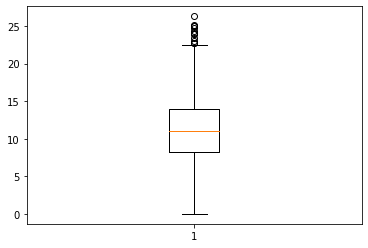

In [ ]:
plt.boxplot(x = 'Temp',data = temp_data)
plt.show()

In [ ]:

from pandas import DataFrame
from pandas import Grouper

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

In [ ]:
temp_data_squeezed = pd.read_csv('daily-minimum-temperatures.csv',index_col=0,parse_dates=True,squeeze = True)
temp_data_squeezed

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [ ]:
from pandas import DataFrame
from pandas import Grouper

groups = temp_data_squeezed.groupby(Grouper(freq = 'A'))
years = DataFrame()

for name, group in groups:
    years[name.year] = group.values
years  

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


<AxesSubplot:>

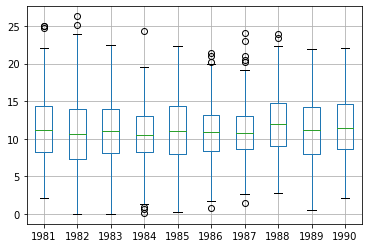

In [ ]:
years.boxplot()

## Lap Plot

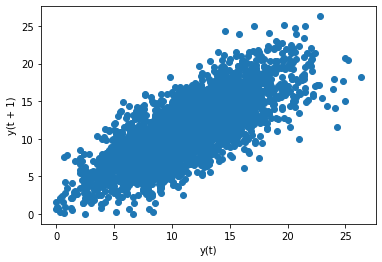

In [ ]:
from pandas.plotting import lag_plot
lag_plot(temp_data_squeezed)
plt.show()

## ACF Plot

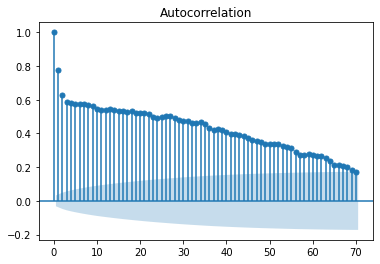

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp_data,lags=70)
plt.show()

# THE END!!